<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [0]:
import matplotlib.pyplot as plt
import numpy
#test
import pandas
import seaborn

In [40]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [41]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [42]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [43]:
ds_full = dataset
ds_full[ds_full.countries == 'Argentina']

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,5.7,8,5,10,7.5,10,10,8.5,10,-,-,10,10,8.8,10,10,10,10,-,-,7.5,9,6.9,7.8,7.5,10,-,-,5,-,...,4,5,6,4.9,10,6.5,6.7,7.3,5.9,6.6,4.6,5.2,4.9,10,5.4,0.8,8,4.7,6.5,5,4.3,9,6.1,2.8,2.2,3.3,10,2.5,10,5.1,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
165,2016,ARG,Argentina,Latin America & the Caribbean,6.75,85,3,7.1,5.8,4.3,5.7,7.6,10,10,7.5,10,10,9.5,10,10,10,10,10,9,10,10,10,10,-,-,7.5,9,6.9,7.8,7.5,10,-,-,5,-,...,3.9,5.2,5.2,2,10,5.6,6.1,7.3,5.9,6.4,4.5,5.2,4.8,10,5.4,0.8,8,4.7,6.5,5,4.3,7,5.4,2.8,2.2,3.4,10,2.5,10,5.2,2.4,6.7,9.1,3.3,5.3,6.5,5.5,5.4,5.4,151
327,2015,ARG,Argentina,Latin America & the Caribbean,6.54,102,3,6.7,5.7,4.3,5.5,7.4,10,10,7.5,10,10,9.5,10,10,10,10,10,9,10,10,10,10,-,-,7.5,8.9,7.2,7.9,7.5,10,-,-,5,-,...,3.8,5.2,5.9,4.7,10,6.5,4.7,7.3,6,6,4,5.2,4.6,0,4.8,0.8,8,4.5,3.8,5,5.3,10,6.8,1.7,2.3,3.4,10,2.5,10,5,2.1,4.4,9.1,2.6,5.4,6,4.9,5.5,5.06,153
489,2014,ARG,Argentina,Latin America & the Caribbean,6.27,116,3,6.5,5.5,3.9,5.3,7,10,10,7.5,10,10,9.5,10,10,10,10,10,8.8,10,10,10,10,-,-,7.5,9,7,7.9,7.5,10,-,-,5,-,...,3.7,6.2,5.7,2.3,5,4.8,4.2,7.3,6,5.8,3.8,3.9,3.8,0,5.5,0.8,8,4.7,3.6,5,8.6,5,6.2,2.8,2.9,3.4,10,2.5,10,5.3,2,4.2,9.1,2.1,5.4,5.5,4.7,5.4,4.61,158
651,2013,ARG,Argentina,Latin America & the Caribbean,6.55,106,3,6.6,5.4,3.7,5.2,7,10,10,7.5,10,10,9.5,10,10,10,10,10,8.8,10,10,10,10,10,10,10,9.3,7.3,8.9,10,10,10,5,7.5,5,...,3.6,6.3,9.3,4.4,5,6.2,4.6,7.3,6.2,6.1,3.2,7.3,5.3,0,3.5,0.8,8,4.1,3.8,5,8.4,7,6.8,1.7,2.6,2.7,10,2.5,10,4.9,2.1,4.2,9,2.8,5.4,5.5,4.8,5.5,4.99,152
813,2012,ARG,Argentina,Latin America & the Caribbean,6.64,99,3,6.6,5.4,3.7,5.2,7,10,10,7.5,10,10,9.5,10,10,10,10,10,8.8,10,10,10,10,10,10,10,9.1,7.1,8.7,10,10,10,5,7.5,5,...,4,6.8,9.4,5.1,5,6.6,3.6,7.5,5.9,5.7,2.4,7.3,4.9,1.2,3.8,0.8,4.6,3.1,3.7,5,9.4,7,7.1,3.9,2.9,2.8,10,2.5,10,5.3,2.2,4.2,9,2.8,4.6,5.5,4.7,5.7,5.19,144
975,2011,ARG,Argentina,Latin America & the Caribbean,6.93,81,3,6.3,5.4,4.3,5.3,7,10,10,7.5,10,10,9.5,10,10,10,10,10,8.8,10,10,10,10,10,10,10,9.4,7.1,8.8,10,10,10,5,7.5,5,...,4.2,8.6,9.2,5.4,5,7.1,4.1,7.3,6.1,5.8,2,7.2,4.6,9,4.7,0.8,4.6,3.4,5.7,5,6.5,7,6.2,3.9,2.8,2.7,10,2.5,10,5.3,2.4,5.3,9,2.9,4.9,5.5,5,5.5,5.72,136
1137,2010,ARG,Argentina,Latin America & the Caribbean,6.96,77,3,6.3,5

In [0]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
    'ef_money_inflation'
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [45]:
dataset[important_cols][dataset.countries == 'Argentina']

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77,4.9
165,2016,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.1,45,5.4,151,6.75,85,2
327,2015,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.03,46,5.06,153,6.54,102,4.7
489,2014,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,7.92,50,4.61,158,6.27,116,2.3
651,2013,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,8.11,44,4.99,152,6.55,106,4.4
813,2012,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,8.1,45,5.19,144,6.64,99,5.1
975,2011,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,8.13,47,5.72,136,6.93,81,5.4
1137,2010,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,8.2,46,5.72,136,6.96,77,4.7
1299,2009,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,8.18,45,5.95,118,7.06,68,6.8
1551,2008,ARG,Argentina,Latin America & the Caribbean,-,10,10,10,10,10,8.19,44,6.01,111,7.1,69,6.9


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [46]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [47]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0,9.6
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0,8.9
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0,3.7
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0,4.9
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0,9.1
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0,9.3
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0,9.5
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0,9.2


In [48]:
dataset[dataset.countries == 'Argentina'].describe()

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
count,10.00000,3.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,2012.50000,10.0,10.0,10.0,10.0,10.0,10.0,8.100000,45.300000,5.432000,140.600000,6.766000,88.000000,4.72000
std,3.02765,0.0,0.0,0.0,0.0,0.0,0.0,0.085894,2.311805,0.458737,15.550634,0.264835,16.619934,1.60125
min,2008.00000,10.0,10.0,10.0,10.0,10.0,10.0,7.920000,41.000000,4.610000,111.000000,6.270000,68.000000,2.00000
25%,2010.25000,10.0,10.0,10.0,10.0,10.0,10.0,8.055000,44.250000,5.092500,136.000000,6.572500,77.000000,4.47500
50%,2012.50000,10.0,10.0,10.0,10.0,10.0,10.0,8.105000,45.000000,5.535000,145.500000,6.805000,83.000000,4.80000
75%,2014.75000,10.0,10.0,10.0,10.0,10.0,10.0,8.167500,46.000000,5.720000,151.750000,6.952500,101.250000,5.32500
max,2017.00000,10.0,10.0,10.0,10.0,10.0,10.0,8.200000,50.000000,6.010000,158.000000,7.100000,116.000000,6.90000


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

  *Resp: Yo propongo compararlos teniendo en cuenta todos los valores para cada variable (10) y graficarlos para poder hacer una comparacion año tras año.
En el caso de comparar regiones, utilizo la mediana, ya que de esta forma no influyen los paises con HF extremos (por ejemplo el caso de Venezuela que esta muy por debajo de la media de Latino America.)*

  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?

  *Resp: NO, porque tenemos pocos datos para cada variable, y cada variable es numerica, lo que nos da un rango muy amplio de posibles valores.*

  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

## 1. Rango de Variables

## Calculamos rango de variables para Latinoamerica y para todo el Mundo.


### Latin America & the Caribbean

In [49]:
# ds_arg_can = dataset[dataset.countries.isin(['Argentina'])]
# ds_arg_can.groupby('countries').median()
ds_latin_america = dataset[dataset.region == 'Latin America & the Caribbean']
ds_world = dataset

ds_latin_america.describe().reset_index()

,index,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
0,count,260.000000,60.000000,258.000000,258.000000,258.000000,248.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
1,mean,2012.500000,3.966667,8.023256,9.224806,8.624031,9.455645,8.582171,7.348333,70.546512,6.725271,79.170543,7.036977,71.918605,8.570930
2,std,2.877821,4.786870,3.990192,2.679335,2.982785,1.494270,1.875832,0.633831,21.876016,0.896733,35.990298,0.634897,25.144817,1.809048
3,min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,5.030000,27.000000,2.580000,10.000000,3.800000,25.000000,0.000000
4,25%,2010.000000,0.000000,10.000000,10.000000,10.000000,10.000000,6.850000,6.932500,53.250000,6.432500,51.000000,6.762500,55.250000,8.525000
5,50%,2012.500000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.290000,71.500000,6.905000,78.000000,7.020000,69.000000,9.100000
6,75%,2015.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.770000,85.000000,7.287500,105.500000,7.377500,87.000000,9.500000
7,max,2017.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.820000,149.000000,7.930000,162.000000,8.180000,161.000000,10.000000


### World

In [50]:

ds_world.describe().reset_index()

,index,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
0,count,1620.000000,308.000000,1537.000000,1540.000000,1540.000000,1519.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1569.000000
1,mean,2012.500000,6.379870,6.701366,7.922078,7.314935,7.485188,7.280649,7.163409,77.671429,6.792981,77.420779,6.978214,77.465584,8.857616
2,std,2.873168,3.640415,4.685828,4.038529,4.056317,3.502156,3.181577,1.392409,44.757695,0.906827,44.776169,1.056239,44.782074,1.415785
3,min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000,1.000000,2.580000,1.000000,3.690000,1.000000,0.000000
4,25%,2010.000000,7.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.147500,39.000000,6.220000,39.000000,6.280000,39.000000,8.600000
5,50%,2012.500000,7.000000,10.000000,10.000000,10.000000,10.000000,8.800000,7.145000,77.500000,6.880000,77.000000,6.900000,77.000000,9.300000
6,75%,2015.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.380000,116.000000,7.440000,116.000000,7.880000,116.000000,9.700000
7,max,2017.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.560000,162.000000,9.110000,162.000000,9.120000,162.000000,10.000000


4. Para mi no tiene sentido calcular la moda, debido a que contamos con 10 valores por variable y al ser numericos dificilmente tenga sentido buscar los que mas se repitan.

In [51]:
dataset[dataset.countries == 'Italy']

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
73,2017,ITA,Italy,Western Europe,7.0,10.0,10.0,10.0,10.0,9.0,8.67,31.0,7.41,46.0,8.04,32.0,9.8
235,2016,ITA,Italy,Western Europe,7.0,10.0,10.0,10.0,10.0,9.0,8.66,30.0,7.43,42.0,8.05,32.0,10.0
397,2015,ITA,Italy,Western Europe,7.0,10.0,10.0,10.0,10.0,9.0,8.69,31.0,7.48,40.0,8.09,31.0,10.0
559,2014,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.70,33.0,7.42,45.0,8.06,33.0,10.0
721,2013,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.76,27.0,7.35,46.0,8.06,31.0,9.8
883,2012,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.72,30.0,7.38,43.0,8.05,33.0,9.4
1045,2011,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.74,30.0,7.40,40.0,8.07,35.0,9.5
1207,2010,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.76,31.0,7.36,43.0,8.06,31.0,9.7
1369,2009,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.79,30.0,7.15,53.0,7.97,37.0,9.8
1585,2008,ITA,Italy,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,8.79,30.0,7.24,48.0,8.01,35.0,9.3


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

In [0]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

seaborn.set_context(context='talk', font_scale=1.2)

In [53]:
# ds_mean_by_year = dataset[dataset.countries == 'Argentina'].groupby(by='year').mean()
# porque Argentina tiene 10 para todos los años??
ds_mean_by_year = dataset.groupby(by='year').mean()
ds_mean_by_year

,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,ef_money_inflation
year,,,,,,,,,,,,,
2008,NaN,6.928571,8.156028,7.553191,7.892857,7.721986,7.394539,71.0,6.762340,70.723404,7.078014,70.780142,7.985816
2009,NaN,6.928571,8.156028,7.553191,7.892857,7.721986,7.399078,71.0,6.767872,70.730496,7.083050,70.815603,9.042553
2010,NaN,6.710526,7.973856,7.352941,7.599338,7.485621,7.297451,77.0,6.772484,76.692810,7.035294,76.784314,9.039869
2011,NaN,6.666667,7.843137,7.254902,7.599338,7.452941,7.223922,77.0,6.804641,76.764706,7.014575,76.686275,8.628395
2012,NaN,6.666667,7.843137,7.254902,7.599338,7.452941,7.162810,77.0,6.793137,76.732026,6.978039,76.836601,8.791975
2013,NaN,6.560510,7.770701,7.165605,7.532468,7.367516,7.145796,79.0,6.794395,78.757962,6.970191,78.777070,8.991975
2014,NaN,6.635220,7.955975,7.295597,7.532051,7.416352,7.077107,80.0,6.823333,79.792453,6.949937,79.798742,9.049383
2015,6.303922,6.698113,7.955975,7.327044,7.532051,6.964151,7.041069,80.0,6.802453,79.773585,6.922264,79.836478,9.045062
2016,6.310680,6.635802,7.808642,7.222222,7.437107,6.870370,6.982346,81.5,6.803148,81.240741,6.892716,81.265432,9.010494


Text(0.5, 0, 'Years')

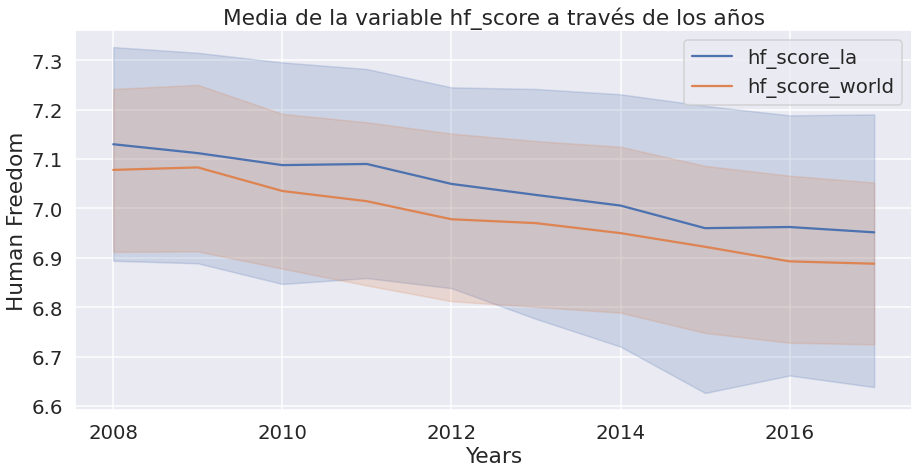

In [54]:
plt.figure(figsize=(15,7))
plt.title('Media de la variable hf_score a través de los años')
seaborn.lineplot(data=ds_latin_america, x='year', y='hf_score', label='hf_score_la')
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='hf_score_world')
# seaborn.lineplot(data=dataset, x='year', y='hf_score', estimator=numpy.median, label='hf_score_world_median')
# seaborn.lineplot(data=dataset[dataset.countries == 'Canada'], x='year', y='hf_score', label='canada')
# seaborn.lineplot(data=dataset[dataset.countries == 'Argentina'], x='year', y='hf_score', label='Argentina')
# seaborn.lineplot(data=dataset[dataset.countries == 'Venezuela'], x='year', y='hf_score', label='Venezuela')
# seaborn.lineplot(data=dataset[dataset.countries == 'Chile'], x='year', y='hf_score', label='Chile')
# seaborn.lineplot(data=dataset[dataset.countries == 'Brazil'], x='year', y='hf_score', label='Brazil')
# plt.xticks(rotation=45);
plt.ylabel('Human Freedom')
plt.xlabel('Years')

Se aprecia una disminución en la Libertad a nivel mundial que afecta en similares medidas tanto a latinoamerica como al mundo entero.

Text(0.5, 0, 'Years')

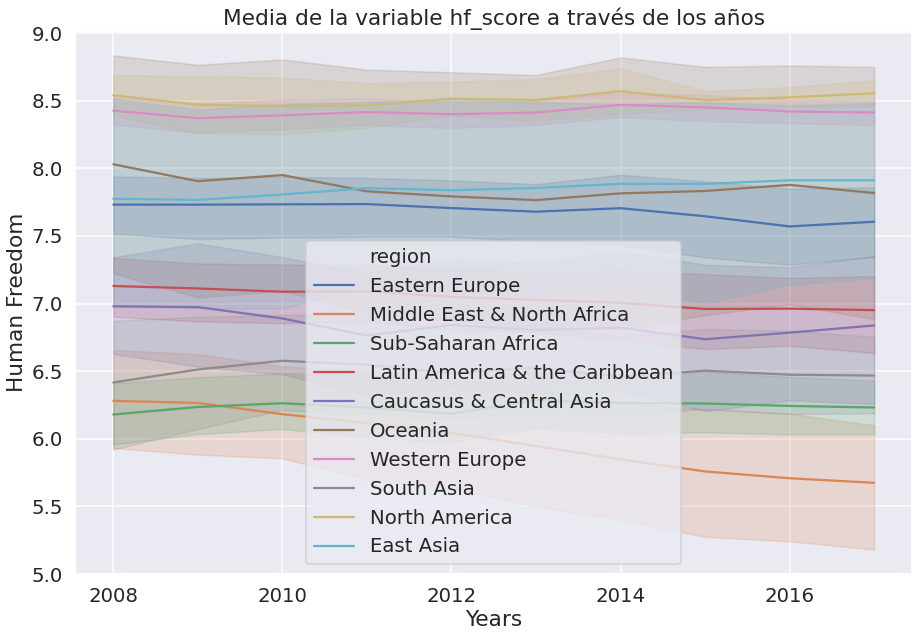

In [55]:
plt.figure(figsize=(15,10))
plt.title('Media de la variable hf_score a través de los años')
seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region')

plt.ylabel('Human Freedom')
plt.xlabel('Years')

## ARGENTINA

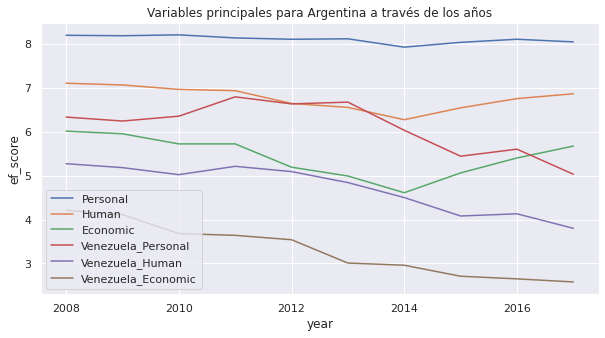

In [56]:
seaborn.set()
plt.figure(figsize=(10,5))
plt.title('Variables principales para Argentina a través de los años')
seaborn.lineplot(data=dataset[dataset.countries == 'Argentina'], x='year', y='pf_score', label='Personal')
seaborn.lineplot(data=dataset[dataset.countries == 'Argentina'], x='year', y='hf_score', label='Human')
seaborn.lineplot(data=dataset[dataset.countries == 'Argentina'], x='year', y='ef_score', label='Economic')
seaborn.lineplot(data=dataset[dataset.countries == 'Venezuela'], x='year', y='pf_score', label='Venezuela_Personal')
seaborn.lineplot(data=dataset[dataset.countries == 'Venezuela'], x='year', y='hf_score', label='Venezuela_Human')
seaborn.lineplot(data=dataset[dataset.countries == 'Venezuela'], x='year', y='ef_score', label='Venezuela_Economic')

## Media para pf_identity

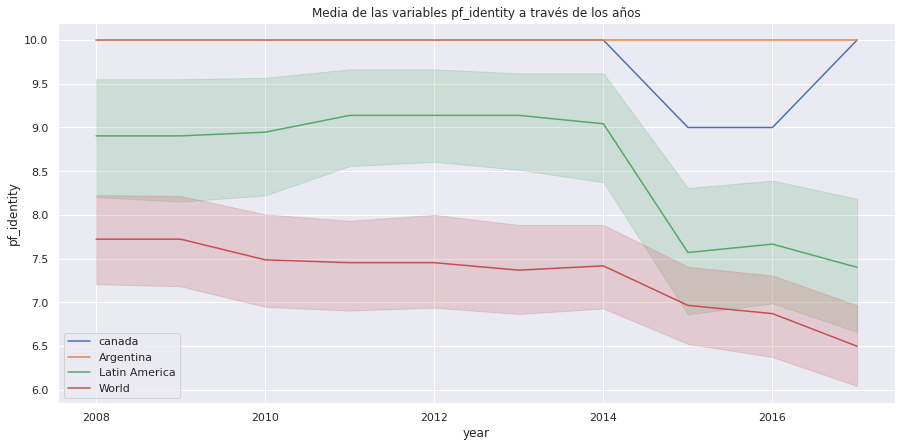

In [57]:
plt.figure(figsize=(15,7))
plt.title('Media de las variables pf_identity a través de los años')
# seaborn.lineplot(data=ds_latin_america, x='year', y='pf_identity', label='pf_identity_la')
# seaborn.lineplot(data=dataset[dataset.region.isin(['North America', 'Latin America & the Caribbean'])], x='year', y='pf_identity',  hue='region')
# seaborn.lineplot(data=dataset[dataset.countries.isin(['Argentina', 'Venezuela', 'Canada'])], x='year', y='pf_identity',  hue='countries')
seaborn.lineplot(data=dataset[dataset.countries == 'Canada'], x='year', y='pf_identity', label='canada')
seaborn.lineplot(data=dataset[dataset.countries == 'Argentina'], x='year', y='pf_identity', label='Argentina')
seaborn.lineplot(data=dataset[dataset.region == 'Latin America & the Caribbean'], x='year', y='pf_identity', label='Latin America')
seaborn.lineplot(data=dataset, x='year', y='pf_identity', label='World')

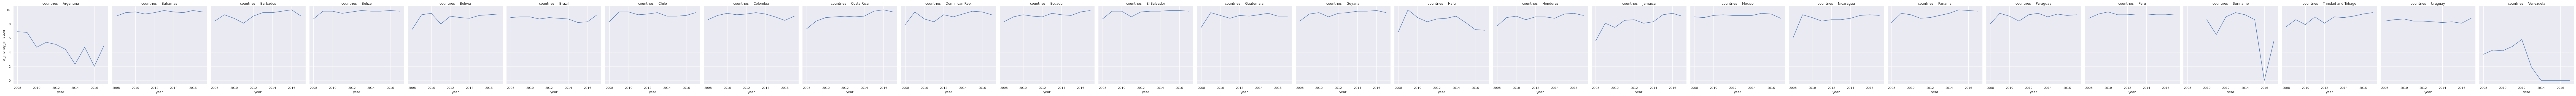

In [60]:
import seaborn as sns
sns.set()
# fmri = sns.load_dataset("fmri")
sns.relplot(x="year", y="ef_money_inflation", col="countries",
            # hue="event", 
            # style="event",
            kind="line", data=dataset[dataset.region == 'Latin America & the Caribbean']);

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?